<H1 align = center> Does Los Angeles Support the Rams? </H1>
<H2 align = center> An analysis by: Josh Jaeger </H2>

We will be using the following libraries for our analysis:

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
AttendanceDataDF = pd.read_csv(r"rams data set.csv", header = 0, index_col = False)

In [21]:
AttendanceDataDF

,Year,Attendance,Capacity,Attendance Per Game,Wins,Playoffs,Super Bowl,Location
0,1986,474282,"69,008","59,285",10,1,0,LA
1,1987,331491,"69,008","47,356",6,0,0,LA
2,1988,435749,"69,008","54,469",10,1,0,LA
3,1989,470770,"69,008","58,846",11,1,0,LA
4,1990,479356,"69,008","59,920",5,0,0,LA
5,1991,412685,"69,008","51,586",3,0,0,LA
6,1992,382466,"69,008","47,808",6,0,0,LA
7,1993,363211,"69,008","45,401",5,0,0,LA
8,1994,338770,"69,008","42,346",4,0,0,LA
9,1995,"496,486","63,348","62,061",7,0,0,STL


In [22]:
AttendanceDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 36 non-null     int64 
 1   Attendance           36 non-null     object
 2    Capacity            36 non-null     object
 3   Attendance Per Game  36 non-null     object
 4   Wins                 36 non-null     int64 
 5   Playoffs             36 non-null     int64 
 6   Super Bowl           36 non-null     int64 
 7   Location             36 non-null     object
dtypes: int64(4), object(4)
memory usage: 2.4+ KB


<H3> Data Cleansing and Pre-Processing </H3>

In [23]:
#Remove 2020 because stadium was closed to the public
AttendanceDataDF = AttendanceDataDF.drop(labels= [34,30], axis= 0)

In [24]:
#Convert numeric types to numeric
AttendanceDataDF["Attendance"] = AttendanceDataDF["Attendance"].str.replace(',','').astype(float)
AttendanceDataDF["Attendance Per Game"] = AttendanceDataDF["Attendance Per Game"].str.replace(',','').astype(float)
AttendanceDataDF[" Capacity "] = AttendanceDataDF[" Capacity "].str.replace(',','').astype(float)

In [25]:
def WinningStreak(df, Compare, Change):
    winningStreak = 0
    df[Change] = 0
    for index in AttendanceDataDF.index:
        if df.at[index, Compare] >= 8:
            winningStreak = winningStreak + 1
        else:
            winningStreak = 0
        df.at[index, Change] = winningStreak
        
    return df
    

In [26]:
AttendanceDataDF = WinningStreak(AttendanceDataDF, "Wins", "Winning Season Streak")

In [27]:
STLAttendance = AttendanceDataDF[AttendanceDataDF["Location"] == "STL"]

In [28]:
LAAttendance = AttendanceDataDF[AttendanceDataDF["Location"] == "LA"]

In [29]:
sns.set_theme(style = "ticks")

<AxesSubplot:xlabel='Year', ylabel='Attendance'>

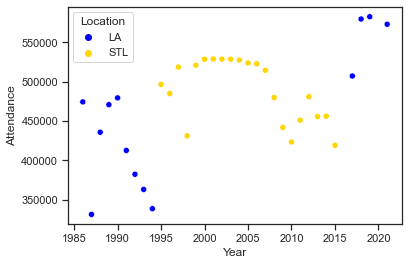

In [30]:
sns.scatterplot(data = AttendanceDataDF, x = "Year", y = "Attendance", hue = "Location",palette = ["Blue","Gold"] )

<AxesSubplot:xlabel='Attendance'>

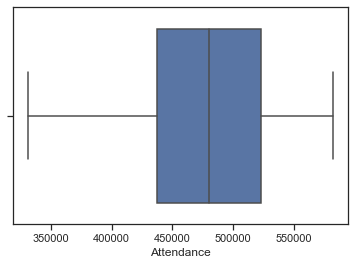

In [31]:
sns.boxplot(data = AttendanceDataDF, x="Attendance")

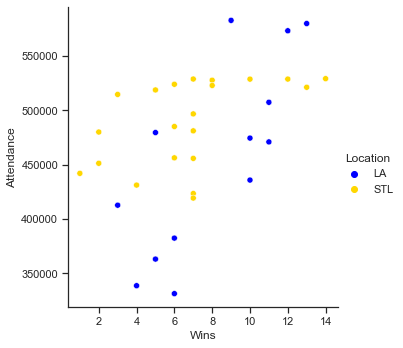

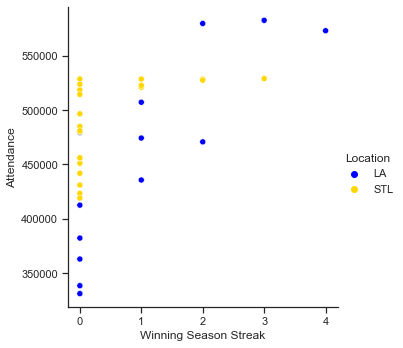

In [32]:
for column in ["Wins", "Winning Season Streak"]:
    sns.relplot(data = AttendanceDataDF, y = "Attendance", x = column,hue = "Location", palette = ["Blue","Gold"])
    plt.show()

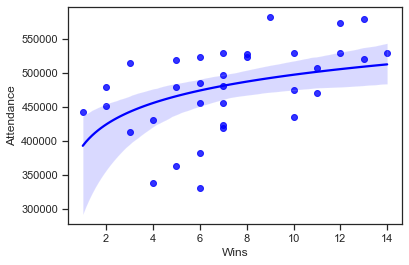

In [33]:
sns.regplot(data = AttendanceDataDF, y = "Attendance", x = "Wins", logx = True, color = "Blue")
plt.show()

In [34]:
AttendanceDataDF["Log Wins"] = np.log(AttendanceDataDF["Wins"])

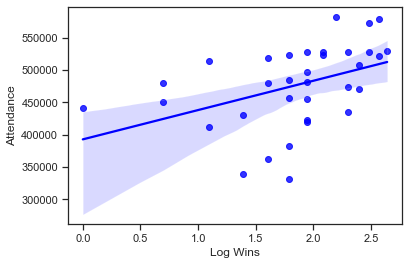

In [35]:
sns.regplot(data = AttendanceDataDF, y = "Attendance", x = "Log Wins", color = "Blue")
plt.show()

In [36]:
AttendanceDataDF = pd.get_dummies(AttendanceDataDF, columns=["Location"])

In [55]:
corr = AttendanceDataDF.drop(columns = ["Year","Attendance","Wins"]).corr()

In [56]:
corr.style.background_gradient(cmap='coolwarm')

,Capacity,Attendance Per Game,Playoffs,Super Bowl,Winning Season Streak,Log Wins,Location_LA,Location_STL
Capacity,1.000000,0.207417,0.320340,0.124527,0.298477,0.274744,0.532296,-0.532296
Attendance Per Game,0.207417,1.000000,0.440397,0.443651,0.623431,0.443105,-0.233852,0.233852
Playoffs,0.320340,0.440397,1.000000,0.528004,0.717685,0.668587,0.232107,-0.232107
Super Bowl,0.124527,0.443651,0.528004,1.000000,0.611224,0.447501,0.088399,-0.088399
Winning Season Streak,0.298477,0.623431,0.717685,0.611224,1.000000,0.608978,0.272373,-0.272373
Log Wins,0.274744,0.443105,0.668587,0.447501,0.608978,1.000000,0.204858,-0.204858
Location_LA,0.532296,-0.233852,0.232107,0.088399,0.272373,0.204858,1.000000,-1.000000
Location_STL,-0.532296,0.233852,-0.232107,-0.088399,-0.272373,-0.204858,-1.000000,1.000000


<H3> Multiple Linear Regression </H3>

In [62]:
y = AttendanceDataDF["Attendance Per Game"]
X = AttendanceDataDF[["Winning Season Streak","Location_STL", "Location_LA"]]
X["Const"] = 1

C:\Users\Josh\AppData\Local\Temp/ipykernel_116100/2494861897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Const"] = 1


In [63]:
#Fit Model
model = sm.OLS(y,X).fit()

#Summarize Model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Attendance Per Game   R-squared:                       0.565
Model:                             OLS   Adj. R-squared:                  0.537
Method:                  Least Squares   F-statistic:                     20.10
Date:                 Sat, 05 Feb 2022   Prob (F-statistic):           2.52e-06
Time:                         19:22:50   Log-Likelihood:                -337.45
No. Observations:                   34   AIC:                             680.9
Df Residuals:                       31   BIC:                             685.5
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Winning Season Streak  5189.5478    861.168      6.026      0.000    3433.185    6945.911
Location_STL           2.178e+04    893.338     24.380      0.000       2e+04    2.36e+04
Location_LA            1.506e+04   1136.067     13.252      0.000    1.27e+04    1.74e+04
Const                  3.683e+04    754.894     48.795      0.000    3.53e+04    3.84e+04
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.164
Skew:                           0.164   Prob(JB):                        0.559
Kurtosis:                       2.155   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<H3> NFL Wide Cluster Analysis </H3>

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [64]:
NFLData = pd.read_csv(r"NFL Wide Cluster.csv",header = 0, index_col = False)

In [83]:
NFLData

,TEAM,AVG,Ticket Cost,Wins
0,Arizona Cardinals,62622,84.83,11
1,Atlanta Falcons,67586,105.57,7
2,Baltimore Ravens,70537,110.53,8
3,Buffalo Bills,67816,82.49,11
4,Carolina Panthers,71906,114.67,5
5,Chicago Bears,60834,122.90,6
6,Cincinnati Bengals,60325,82.05,10
7,Cleveland Browns,67431,100.52,8
8,Dallas Cowboys,93421,99.50,12
9,Denver Broncos,76236,110.87,7


In [96]:
X = NFLData[["TEAM","AVG","Ticket Cost", "Wins"]]

In [97]:
scaler = MinMaxScaler()

In [98]:
scaler.fit(X[["AVG","Ticket Cost", "Wins"]])
Xscale = scaler.transform(X[["AVG","Ticket Cost", "Wins"]])
Xscale = pd.DataFrame(Xscale)
Xscale.columns = X[["AVG","Ticket Cost", "Wins"]].columns

In [99]:
Xscale

,AVG,Ticket Cost,Wins
0,0.264923,0.060884,0.8
1,0.383398,0.344644,0.4
2,0.453829,0.412505,0.5
3,0.388888,0.028869,0.8
4,0.486503,0.469148,0.2
5,0.222249,0.581749,0.3
6,0.210100,0.022849,0.7
7,0.379699,0.275551,0.5
8,1.000000,0.261595,0.9
9,0.589847,0.417157,0.4


In [136]:
kmeans = KMeans(n_clusters = 6, random_state=0)

In [137]:
ClusterIndex = kmeans.fit_predict(Xscale)
ClusterIndex = pd.DataFrame(ClusterIndex)

In [138]:
ClusterNFL = ClusterIndex.merge(Xscale, left_index = True, right_index=True)
ClusterNFL = ClusterNFL.merge(X["TEAM"],left_index = True, right_index=True)
ClusterNFL = ClusterNFL.rename(columns={0:"Cluster"})

In [139]:
ClusterNFL

,Cluster,AVG,Ticket Cost,Wins,TEAM
0,0,0.264923,0.060884,0.8,Arizona Cardinals
1,3,0.383398,0.344644,0.4,Atlanta Falcons
2,3,0.453829,0.412505,0.5,Baltimore Ravens
3,0,0.388888,0.028869,0.8,Buffalo Bills
4,4,0.486503,0.469148,0.2,Carolina Panthers
5,3,0.222249,0.581749,0.3,Chicago Bears
6,0,0.210100,0.022849,0.7,Cincinnati Bengals
7,3,0.379699,0.275551,0.5,Cleveland Browns
8,5,1.000000,0.261595,0.9,Dallas Cowboys
9,4,0.589847,0.417157,0.4,Denver Broncos


<AxesSubplot:xlabel='AVG', ylabel='Ticket Cost'>

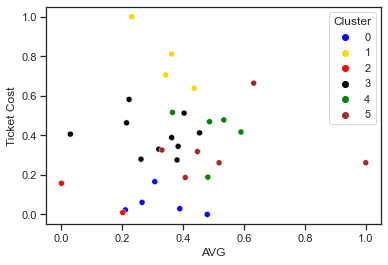

In [141]:
sns.scatterplot(data = ClusterNFL, x = "AVG", y = "Ticket Cost", hue = "Cluster",palette = ["Blue","Gold","Red","Black","Green","Brown"] )

<AxesSubplot:xlabel='AVG', ylabel='Wins'>

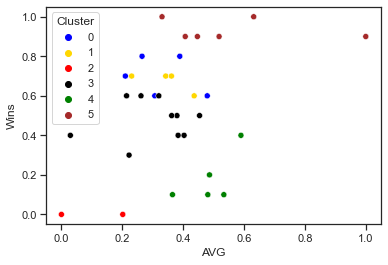

In [142]:
sns.scatterplot(data = ClusterNFL, x = "AVG", y = "Wins", hue = "Cluster",palette = ["Blue","Gold","Red","Black","Green","Brown"] )